In [1]:
from collections import defaultdict
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = ('Tree_Species_Dataset/')

In [3]:
import os 
print('Class Folder')
print(os.listdir(data))

Class Folder
['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [4]:
class_counts = defaultdict(int)
for class_name in os.listdir(data):
    class_path = os.path.join(data, class_name)
    if os.path.isdir(class_path) and not class_name.startswith('.'):
        class_counts[class_name] = len([
            f  for f  in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f ))
        ])

In [5]:
print('Number of images per class ')
for cls, count in sorted(class_counts.items()):
    print(f'{cls:20s} : {count}')

Number of images per class 
amla                 : 50
asopalav             : 50
babul                : 50
bamboo               : 50
banyan               : 50
bili                 : 50
cactus               : 50
champa               : 50
coconut              : 50
garmalo              : 50
gulmohor             : 50
gunda                : 50
jamun                : 50
kanchan              : 50
kesudo               : 50
khajur               : 50
mango                : 50
motichanoti          : 50
neem                 : 50
nilgiri              : 50
other                : 150
pilikaren            : 50
pipal                : 50
saptaparni           : 50
shirish              : 50
simlo                : 50
sitafal              : 50
sonmahor             : 50
sugarcane            : 50
vad                  : 50


In [6]:
print("Total images:", sum(class_counts.values()))
print("Total classes:", len(class_counts))

Total images: 1600
Total classes: 30


In [7]:
image_shapes = []
for cls in  os.listdir (data):
    folder_path = os.path.join(data , cls)
    if os.path.isdir(folder_path) and not cls.startswith('.'):
        for img_file in os.listdir(folder_path)[:10]:
            img_path = os.path.join(folder_path, img_file)           
            img = cv2.imread(img_path)
            if img is not None:
                h, w, c = img.shape
                image_shapes.append((h,w,c))

shape_array = np.array(image_shapes)

print('Images  shape stats (from sample): ')
print(f"Min Height x Width:{shape_array[:,0].min()} x {shape_array[:,1].min()}")
print(f"Max Height x Width:{shape_array[:,0].max()} x {shape_array[:,1].max ()}")
print(f"Mean Height x Width:{shape_array[:,0].mean():.2f} x {shape_array[:,1].mean():.2f}")
print(f"Channels detected:{np.unique(shape_array[:,2])}")


Images  shape stats (from sample): 
Min Height x Width:147 x 155
Max Height x Width:3000 x 4000
Mean Height x Width:320.71 x 348.34
Channels detected:[3]


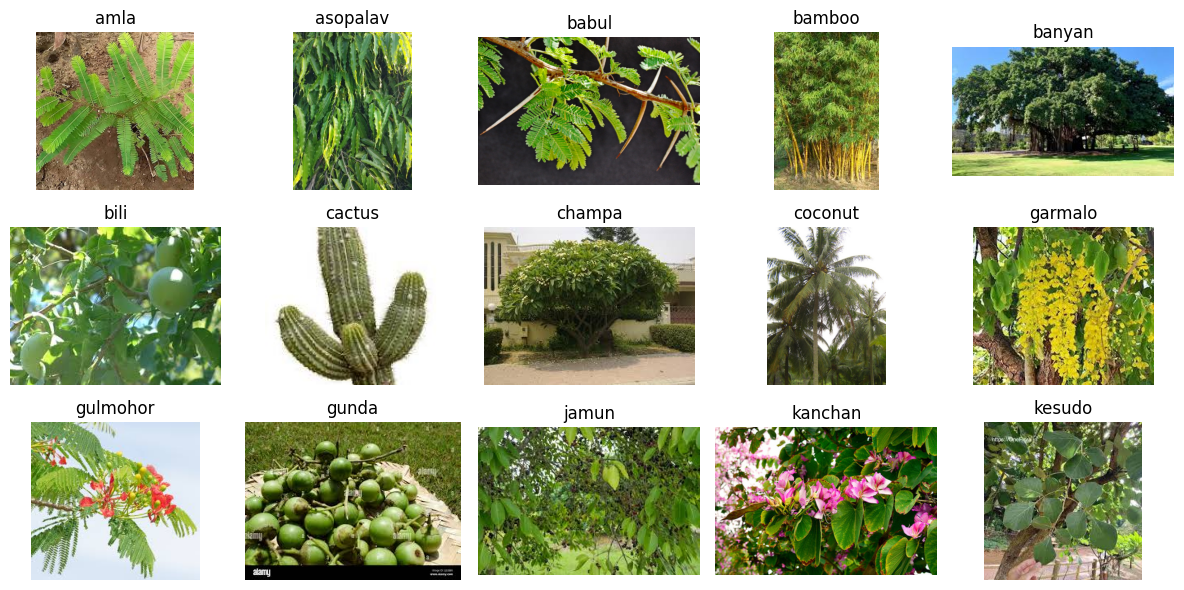

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
i = 0
for cls in sorted(os.listdir(data)):
    cls_path = os.path.join(data, cls)
    if os.path.isdir(cls_path) and not cls.startswith('.'):
        files = os.listdir(cls_path)
        if files:
            img_path = os.path.join(cls_path, files[0])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3, 5, i+1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            i += 1
        if i == 15:
            break

plt.tight_layout()

# Save before showing
plt.savefig('treeSpecies.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()
